# Task 1 — Foundation Document

Interim submission scope: Task 1 only.
## Data Analysis Workflow
1. Load Brent prices; parse Date to datetime; sort and validate gaps.
2. Clean data (missing values, duplicates).
3. Feature engineering: returns, log returns, rolling stats.
4. EDA: trend, stationarity tests, volatility patterns.
5. Change point modeling (PyMC): single change point baseline.
6. Interpretation: map change points to events; quantify shifts.
7. Communication: dashboard, report, and API outputs.

## Event Research Dataset
- CSV: `data/events/key_events.csv` (25 events, 1990–2022).

## Assumptions & Limitations
- Prices reflect information quickly; event impact may be delayed.
- Correlation in time ≠ causal impact; results are probabilistic.
- Overlapping events can confound attribution.
- Single change point model is simplified; multi‑regime exists.

## Communication Channels
- Stakeholders: investors, policymakers, energy companies.
- Formats: MkDocs report, dashboard, and API outputs.

## Time Series Properties (Implemented in this notebook)
- Trend analysis: price plot (1997–2022) below.
- Stationarity testing: ADF on log returns (use `test_stationarity`).
- Volatility patterns: rolling volatility plot (use `plot_rolling_volatility`).

## Change Point Model (Purpose & Outputs)
- Purpose: detect structural breaks in mean/variance.
- Outputs: posterior of tau, before/after parameters, uncertainty.
- Limitations: sensitive to priors and model choice.

In [8]:
# Imports
import sys
from pathlib import Path

ROOT = Path('..').resolve()
sys.path.append(str(ROOT))

from src.time_series import load_brent_prices, add_log_returns, rolling_volatility, adf_test
from src.visualization import setup_plotting_style, plot_price_series, plot_log_returns, plot_rolling_volatility

setup_plotting_style()

df = load_brent_prices(str(ROOT / 'data' / 'raw' / 'BrentOilPrices.csv'))
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [11]:
# Basic validation / defensive checks
required_cols = {'Date', 'Price'}
missing_cols = required_cols - set(df.columns)
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

missing_prices = df['Price'].isna().sum()
print(f"Missing Price values: {missing_prices}")
print(f"Date range: {df['Date'].min().date()} → {df['Date'].max().date()}")

Missing Price values: 0
Date range: 1987-05-20 → 2020-04-21


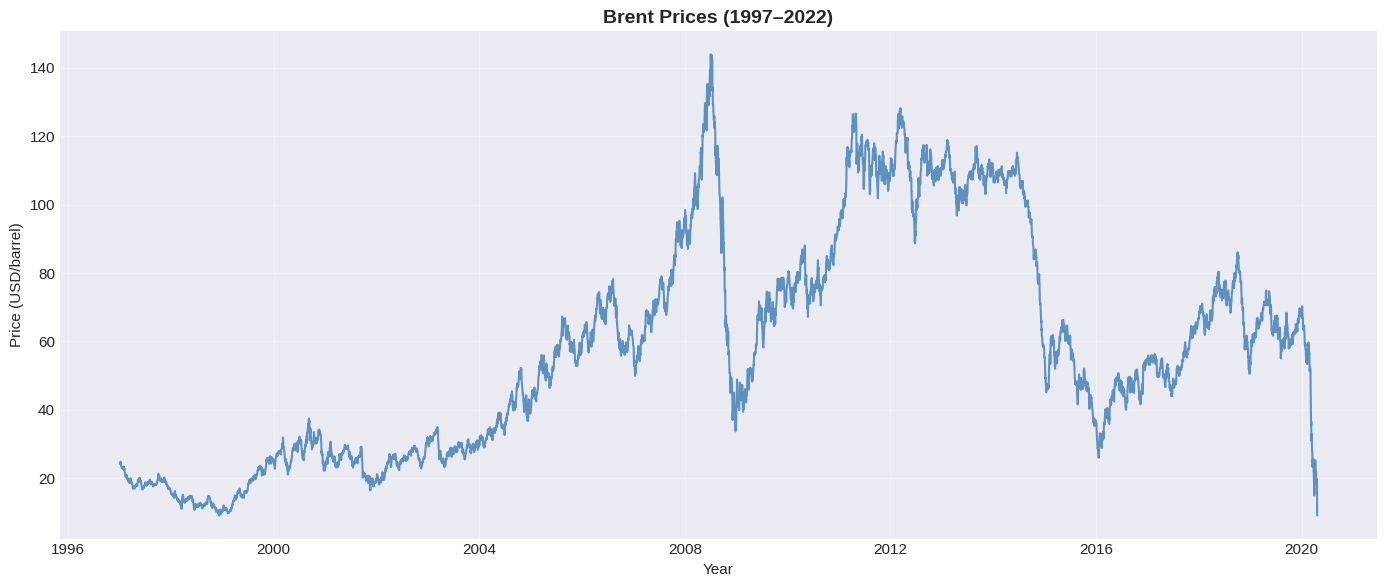

In [12]:
# Price series (1997–2022)
df_1997_2022 = df[(df['Date'] >= '1997-01-01') & (df['Date'] <= '2022-12-31')].copy()
fig = plot_price_series(df_1997_2022, title='Brent Prices (1997–2022)')
fig.tight_layout()

{'adf_stat': -12.60308859826176,
 'p_value': 1.7191109143088885e-23,
 'is_stationary': True}

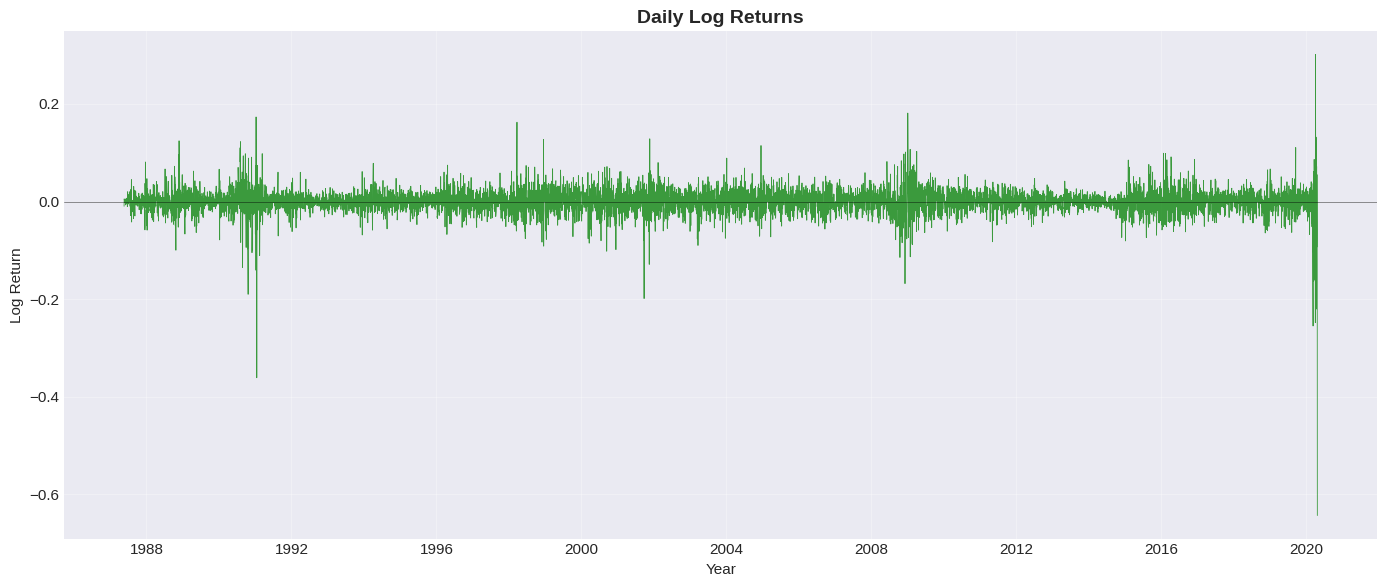

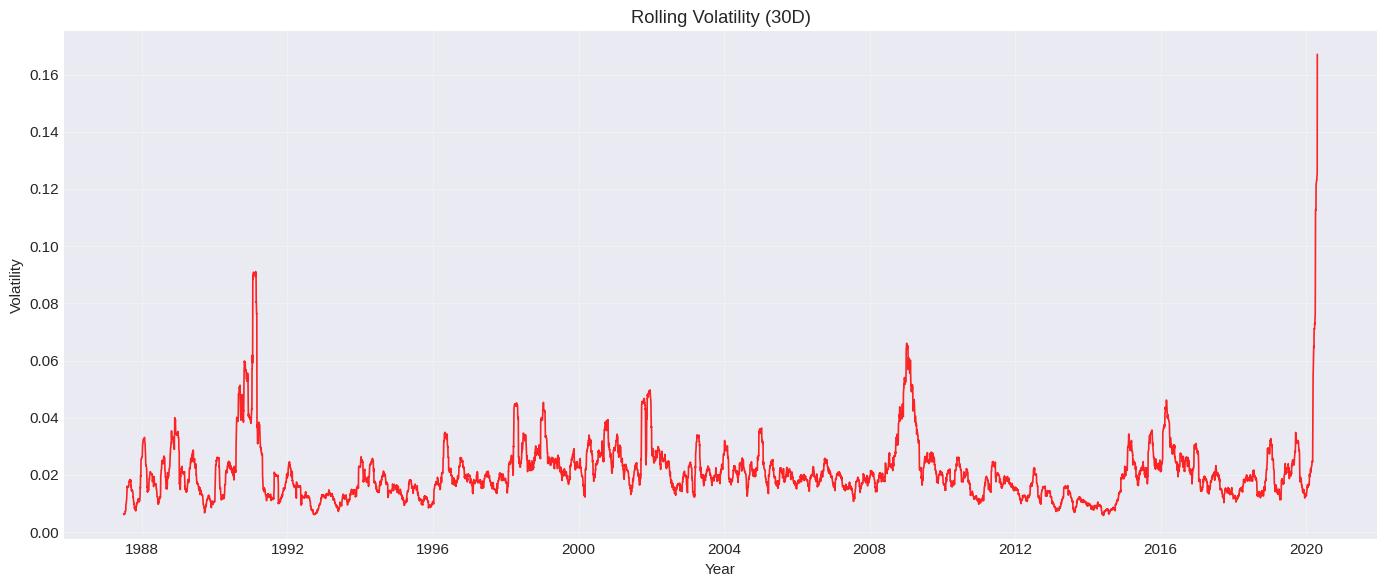

In [13]:
# Time-series analysis using src/time_series.py
df_r = add_log_returns(df)

fig = plot_log_returns(df_r, title='Daily Log Returns')
fig.tight_layout()

fig = plot_rolling_volatility(df_r, window=30, title='Rolling Volatility')
fig.tight_layout()

adf_result = adf_test(df_r['Log_Returns'])
adf_result

In [14]:
# Time-series summary (explicit output for rubric)
print("ADF on Log Returns:", adf_result)
print("Rolling volatility (30D) summary:")
rv = rolling_volatility(df_r['Log_Returns'], window=30)
print(rv.describe())

ADF on Log Returns: {'adf_stat': -12.60308859826176, 'p_value': 1.7191109143088885e-23, 'is_stationary': True}
Rolling volatility (30D) summary:
count    8330.000000
mean        0.020784
std         0.010476
min         0.005807
25%         0.014751
50%         0.019101
75%         0.023886
max         0.167044
Name: Log_Returns, dtype: float64
